<a href="https://colab.research.google.com/github/Mandar117/3D-Object-Detection-and-Tracking-for-Autonomous-Vehicles/blob/main/YOLOv8_Finetuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
YOLOv8 Fine-tuning on KITTI Dataset
===================================
This script prepares the KITTI dataset and fine-tunes YOLOv8
"""
!pip install ultralytics
from ultralytics import YOLO
import os
import cv2
import yaml
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from google.colab import drive

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("klemenko/kitti-dataset")

print("Path to dataset files:", path)

100%|██████████| 22.5G/22.5G [17:53<00:00, 22.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/klemenko/kitti-dataset/versions/1


CUDA available: True
GPU: Tesla T4
Step 1: Converting KITTI to YOLO format
Converting KITTI dataset to YOLO format...
Found 7481 images
Train set: 5984 images
Validation set: 1497 images


Processing train set:   0%|          | 0/5984 [00:00<?, ?it/s]

Processing val set:   0%|          | 0/1497 [00:00<?, ?it/s]

Created dataset.yaml at /kaggle/working/yolo_format/dataset.yaml
Conversion completed successfully!

Step 2: Fine-tuning YOLOv8 on KITTI dataset
Starting YOLOv8 fine-tuning for 10 epochs...


Ultralytics 8.3.178 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/yolo_format/dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=True, pose=12.0, pret

Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1     37248  ultralytics.nn.modules.block.C2f             [192, 64, 1]                  
 16                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  1    123648  ultralytics.nn.modules.block.C2f             [192, 128, 1]                 
 19                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128,

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 747.8±1462.1 MB/s, size: 845.3 KB)


train: Scanning /kaggle/working/yolo_format/labels/train... 5984 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5984/5984 [00:33<00:00, 178.69it/s]


train: New cache created: /kaggle/working/yolo_format/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 128.7±16.6 MB/s, size: 814.3 KB)


val: Scanning /kaggle/working/yolo_format/labels/val... 1497 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1497/1497 [00:08<00:00, 169.50it/s]

val: New cache created: /kaggle/working/yolo_format/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      1.08G      1.427      1.741      1.111         50        640: 100%|██████████| 748/748 [02:43<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:23<00:00,  3.94it/s]


                   all       1497       8239       0.43      0.391      0.389      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       1.1G      1.304      1.137      1.081         46        640: 100%|██████████| 748/748 [02:35<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:21<00:00,  4.32it/s]


                   all       1497       8239      0.544      0.422      0.462      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      1.12G      1.249     0.9708      1.064         50        640: 100%|██████████| 748/748 [02:33<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:21<00:00,  4.38it/s]


                   all       1497       8239      0.616      0.491      0.542      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      1.13G      1.207     0.8856      1.048         42        640: 100%|██████████| 748/748 [02:34<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:19<00:00,  4.79it/s]


                   all       1497       8239      0.556      0.527      0.545      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      1.16G      1.165     0.8281      1.033         59        640: 100%|██████████| 748/748 [02:33<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:20<00:00,  4.60it/s]


                   all       1497       8239      0.628      0.522      0.557      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      1.17G      1.121     0.7749      1.014         38        640: 100%|██████████| 748/748 [02:34<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:20<00:00,  4.66it/s]


                   all       1497       8239       0.73      0.559      0.634      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      1.19G      1.083     0.7333     0.9954         37        640: 100%|██████████| 748/748 [02:34<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:20<00:00,  4.58it/s]


                   all       1497       8239      0.716       0.59      0.626      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10       1.2G      1.048     0.6939     0.9854         37        640: 100%|██████████| 748/748 [02:33<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:21<00:00,  4.38it/s]

                   all       1497       8239      0.761      0.601      0.661      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      1.22G      1.017     0.6617     0.9714         38        640: 100%|██████████| 748/748 [02:33<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:20<00:00,  4.68it/s]


                   all       1497       8239      0.799      0.619      0.711      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      1.24G      0.987     0.6344     0.9604         33        640: 100%|██████████| 748/748 [02:33<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:19<00:00,  4.84it/s]


                   all       1497       8239      0.772      0.647      0.708      0.458

10 epochs completed in 0.491 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.178 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:18<00:00,  4.96it/s]


                   all       1497       8239      0.773      0.645      0.709      0.459
               Vehicle       1363       6450       0.91      0.779      0.893      0.648
                 Truck        193        206      0.833      0.822      0.871      0.642
            Pedestrian        362        989      0.728      0.557      0.649       0.35
               Cyclist        242        326      0.763      0.504      0.592      0.333
                  Tram         62         96      0.689      0.786      0.734      0.423
                  Misc        144        172      0.714       0.42      0.512      0.358
Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train
Ultralytics 8.3.178 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
Model summary (fused): 72 layers, 3,00

val: Scanning /kaggle/working/yolo_format/labels/val.cache... 1497 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1497/1497 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 188/188 [00:21<00:00,  8.95it/s]


                   all       1497       8239      0.774      0.643      0.709       0.46
               Vehicle       1363       6450      0.912      0.778      0.893      0.649
                 Truck        193        206      0.841      0.825      0.871      0.643
            Pedestrian        362        989       0.73      0.555      0.648       0.35
               Cyclist        242        326      0.759        0.5      0.593      0.333
                  Tram         62         96      0.688       0.78      0.735      0.421
                  Misc        144        172      0.716      0.419      0.512      0.361
Speed: 0.2ms preprocess, 2.9ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train2

Step 3: Visualizing training results

image 1/1 /kaggle/working/yolo_format/images/val/004461.png: 224x640 2 Vehicles, 35.8ms
Speed: 1.8ms preprocess, 35.8ms inference, 15.8ms postprocess per image at shape (1, 3, 224, 640)


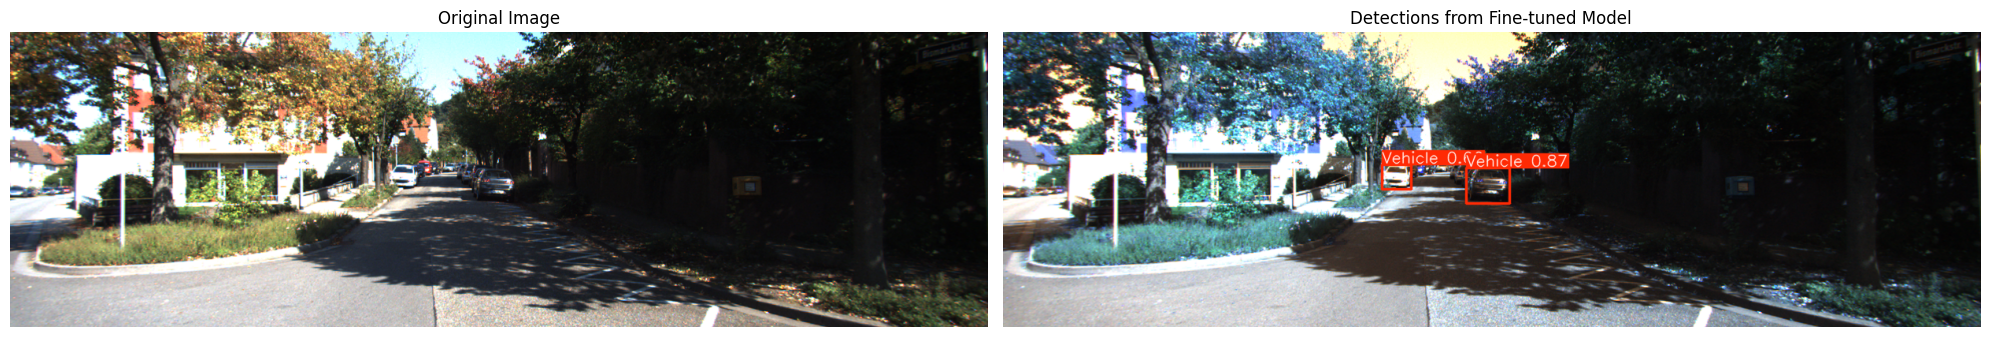

Detected 2 objects
Detection counts by class:
  - Vehicle: 2


In [3]:
# Set paths
DATASET_PATH = path
LEFT_IMG_PATH = os.path.join(DATASET_PATH, 'data_object_image_2/training/image_2')
LABEL_PATH = os.path.join(DATASET_PATH, 'data_object_label_2/training/label_2')

# Create YOLO format dataset directories
YOLO_DATASET_PATH = os.path.join('/kaggle/working', 'yolo_format')
os.makedirs(os.path.join(YOLO_DATASET_PATH, 'images', 'train'), exist_ok=True)
os.makedirs(os.path.join(YOLO_DATASET_PATH, 'images', 'val'), exist_ok=True)
os.makedirs(os.path.join(YOLO_DATASET_PATH, 'labels', 'train'), exist_ok=True)
os.makedirs(os.path.join(YOLO_DATASET_PATH, 'labels', 'val'), exist_ok=True)

# Define KITTI class mapping (customize as needed)
kitti_classes = ['Car', 'Van', 'Truck', 'Pedestrian', 'Person_sitting', 'Cyclist', 'Tram', 'Misc', 'DontCare']

# Map to simplified classes
yolo_class_map = {
    'Car': 0,        # Vehicle
    'Van': 0,        # Vehicle
    'Truck': 1,      # Truck
    'Pedestrian': 2, # Pedestrian
    'Person_sitting': 2, # Pedestrian
    'Cyclist': 3,    # Cyclist
    'Tram': 4,       # Tram
    'Misc': 5,       # Misc
    'DontCare': -1   # Ignore
}

# Simplified class names for YOLOv8
simplified_classes = ['Vehicle', 'Truck', 'Pedestrian', 'Cyclist', 'Tram', 'Misc']

def convert_kitti_to_yolo():
    """Convert KITTI dataset to YOLO format"""
    print("Converting KITTI dataset to YOLO format...")

    # Check if dataset paths exist
    if not os.path.exists(LEFT_IMG_PATH) or not os.path.exists(LABEL_PATH):
        print(f"Error: Image path ({LEFT_IMG_PATH}) or label path ({LABEL_PATH}) does not exist.")
        return False

    # Get all image files
    image_files = [f for f in os.listdir(LEFT_IMG_PATH) if f.endswith('.png')]

    if len(image_files) == 0:
        print("No image files found!")
        return False

    print(f"Found {len(image_files)} images")

    # Split into train/val (80/20 split)
    train_files, val_files = train_test_split(image_files, test_size=0.2, random_state=42)

    print(f"Train set: {len(train_files)} images")
    print(f"Validation set: {len(val_files)} images")

    # Process train and validation sets
    process_files(train_files, 'train')
    process_files(val_files, 'val')

    # Create dataset YAML file
    create_dataset_yaml()

    print("Conversion completed successfully!")
    return True

def process_files(files, subset):
    """Process files for the given subset (train/val)"""
    for file in tqdm(files, desc=f"Processing {subset} set"):
        # Get base filename without extension
        base_name = os.path.splitext(file)[0]

        # Copy image file
        src_img_path = os.path.join(LEFT_IMG_PATH, file)
        dst_img_path = os.path.join(YOLO_DATASET_PATH, 'images', subset, file)

        # Read and write image
        img = cv2.imread(src_img_path)
        if img is None:
            print(f"Warning: Could not read image {src_img_path}")
            continue

        cv2.imwrite(dst_img_path, img)

        # Get image dimensions for normalization
        img_height, img_width = img.shape[:2]

        # Convert label
        label_file = os.path.join(LABEL_PATH, f"{base_name}.txt")
        if not os.path.exists(label_file):
            print(f"Warning: Label file {label_file} does not exist")
            continue

        convert_annotation(label_file, subset, base_name, img_width, img_height)

def convert_annotation(label_file, subset, base_name, img_width, img_height):
    """Convert KITTI annotation to YOLO format"""
    yolo_labels = []

    with open(label_file, 'r') as f:
        for line in f:
            parts = line.strip().split()
            obj_class = parts[0]

            # Skip if class should be ignored
            if obj_class not in yolo_class_map or yolo_class_map[obj_class] == -1:
                continue

            # Extract bounding box
            try:
                x1 = float(parts[4])
                y1 = float(parts[5])
                x2 = float(parts[6])
                y2 = float(parts[7])

                # Skip invalid boxes
                if x2 <= x1 or y2 <= y1:
                    continue

                # Convert to YOLO format (normalized center, width, height)
                x_center = ((x1 + x2) / 2) / img_width
                y_center = ((y1 + y2) / 2) / img_height
                width = (x2 - x1) / img_width
                height = (y2 - y1) / img_height

                # Ensure values are within range [0, 1]
                x_center = max(0, min(1, x_center))
                y_center = max(0, min(1, y_center))
                width = max(0, min(1, width))
                height = max(0, min(1, height))

                # Get YOLO class ID
                yolo_class = yolo_class_map[obj_class]

                # Add to YOLO labels
                yolo_labels.append(f"{yolo_class} {x_center} {y_center} {width} {height}")
            except Exception as e:
                print(f"Error converting annotation: {e}")
                continue

    # Write YOLO format label file
    dst_label_path = os.path.join(YOLO_DATASET_PATH, 'labels', subset, f"{base_name}.txt")
    with open(dst_label_path, 'w') as f:
        f.write('\n'.join(yolo_labels))

def create_dataset_yaml():
    """Create YOLOv8 dataset YAML file"""
    yaml_content = {
        'path': YOLO_DATASET_PATH,
        'train': 'images/train',
        'val': 'images/val',
        'names': {i: name for i, name in enumerate(simplified_classes)}
    }

    yaml_path = os.path.join(YOLO_DATASET_PATH, 'dataset.yaml')
    with open(yaml_path, 'w') as f:
        yaml.dump(yaml_content, f, sort_keys=False)

    print(f"Created dataset.yaml at {yaml_path}")

def finetune_yolov8(epochs=10, batch_size=8, img_size=640):
    """Fine-tune YOLOv8 on the KITTI dataset"""
    # Check if dataset is prepared
    yaml_path = os.path.join(YOLO_DATASET_PATH, 'dataset.yaml')
    if not os.path.exists(yaml_path):
        print("Dataset not prepared! Converting KITTI to YOLO format...")
        if not convert_kitti_to_yolo():
            print("Failed to convert dataset. Aborting fine-tuning.")
            return None

    print(f"Starting YOLOv8 fine-tuning for {epochs} epochs...")

    # Load YOLOv8 model (nano version for faster training)
    model = YOLO('yolov8n.pt')

    # Fine-tune the model
    results = model.train(
        data=yaml_path,
        epochs=epochs,
        batch=batch_size,
        imgsz=img_size,
        patience=5,  # Early stopping patience
        save=True,   # Save checkpoints
        device='0' if torch.cuda.is_available() else 'cpu'
    )

    # Save the fine-tuned model
    model_save_path = os.path.join(DATASET_PATH, 'yolov8n_kitti.pt')
    model.export(format='onnx')  # Also export to ONNX format

    print(f"Fine-tuning completed! Model saved at {model_save_path}")

    # Validate the model
    print("Validating the fine-tuned model...")
    val_results = model.val()

    return model

def visualize_training_results(model):
    """Visualize training results and metrics"""
    # Results should be saved in runs/detect/train directory
    results_dir = list(sorted(os.listdir('runs/detect')))[-1]
    results_path = os.path.join('runs/detect', results_dir)

    # Display training metrics if available
    metrics_path = os.path.join(results_path, 'results.png')
    if os.path.exists(metrics_path):
        plt.figure(figsize=(15, 10))
        plt.imshow(plt.imread(metrics_path))
        plt.axis('off')
        plt.title('Training Metrics')
        plt.show()

    # Test the model on a sample image
    sample_image_path = os.path.join(YOLO_DATASET_PATH, 'images', 'val')
    sample_images = os.listdir(sample_image_path)

    if len(sample_images) == 0:
        print("No sample images available for testing")
        return

    # Select a random sample image
    sample_img = os.path.join(sample_image_path, np.random.choice(sample_images))

    # Run inference
    results = model.predict(sample_img, conf=0.25)[0]

    # Display detection results
    img = cv2.imread(sample_img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # Original image
    ax1.imshow(img)
    ax1.set_title('Original Image')
    ax1.axis('off')

    # Image with detections
    detected_img = results.plot()
    ax2.imshow(detected_img)
    ax2.set_title('Detections from Fine-tuned Model')
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

    # Print detection statistics
    boxes = results.boxes.cpu().numpy()
    print(f"Detected {len(boxes)} objects")

    # Count detections by class
    class_counts = {}
    for box in boxes:
        class_id = int(box.cls)
        class_name = simplified_classes[class_id]
        if class_name in class_counts:
            class_counts[class_name] += 1
        else:
            class_counts[class_name] = 1

    print("Detection counts by class:")
    for class_name, count in class_counts.items():
        print(f"  - {class_name}: {count}")

# Main execution
if __name__ == "__main__":
    # Check necessary imports
    try:
        import torch
    except ImportError:
        print("Installing torch...")
        !pip install torch torchvision
        import torch

    print("CUDA available:", torch.cuda.is_available())
    if torch.cuda.is_available():
        print("GPU:", torch.cuda.get_device_name(0))

    # Prepare dataset
    print("Step 1: Converting KITTI to YOLO format")
    convert_kitti_to_yolo()

    # Fine-tune model
    print("\nStep 2: Fine-tuning YOLOv8 on KITTI dataset")
    model = finetune_yolov8(epochs=10, batch_size=8)

    # Visualize results
    print("\nStep 3: Visualizing training results")
    if model is not None:
        visualize_training_results(model)